In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from yellowbrick.regressor import ResidualsPlot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel(r'C:\Academics\ALY6110\AirQualityUCI.xlsx')
#air =pd.read_excel(r'C:\Academics\ALY6110\AirQualityUCI.xlsx')

# Exploratory Data Analysis

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [8]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


<AxesSubplot:>

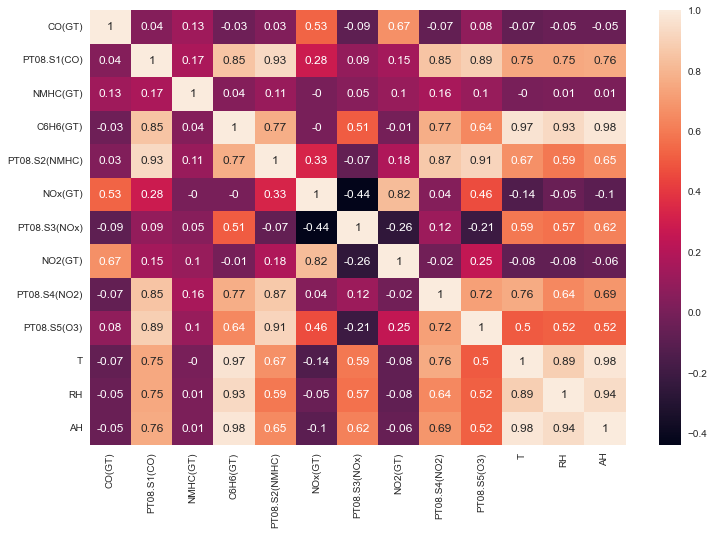

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
df_corr = round(df[df.columns[~df.columns.isin(['Date','Time'])]].corr(),2)
sns.heatmap(df_corr, annot = True, ax = ax)

In [10]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Data Cleaning

In [11]:
df.drop(['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)'], axis=1, inplace=True)
df.shape

(9357, 11)

#### Imputation -1: Setting '-200' to 0 & dropping date and time columns

In [12]:
air = df.drop(['Date', 'Time'], axis=1) 

In [13]:
# Replacing -200 values as NaN values
air.replace(to_replace = -200, value =np.nan,inplace=True)

In [14]:
# filling the null values with 0 (if any exist)
air.fillna(0,inplace=True)

In [15]:
air.shape

(9357, 9)

In [16]:
air.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,1292.25,9.397165,954.75,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


#### Imputation -2: Dropping '-200' rows, Adding Month and Hour Columns, Then drop Date and Time Columns

In [17]:
for column in df:
    df = df[df[column] != -200]

In [18]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.drop(['Date'],axis=1,inplace = True)

In [19]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df.drop(['Time'],axis=1,inplace = True)

In [20]:
df.shape

(8991, 11)

In [21]:
df.head()
#sns.pairplot(df)

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour
0,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,13.60,48.875001,0.757754,3,18
1,1292.25,9.397165,954.75,1173.75,1558.75,972.25,13.30,47.700000,0.725487,3,19
2,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,11.90,53.975000,0.750239,3,20
3,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,11.00,60.000000,0.786713,3,21
4,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,11.15,59.575001,0.788794,3,22


# Modelling for first Imputed Dataset "air"- Response Variable (C6H6)

### Train and Test Split

In [22]:
X = air.drop('C6H6(GT)',1) #considering independent parameter as X
Y = air['C6H6(GT)'] # considering dependent parameter as Y

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Linear Regression Model

In [24]:
##LINEAR REGRESSION MODEL
lm = LinearRegression()
lm.fit(X_train,Y_train)
lm_predict = lm.predict(X_test)

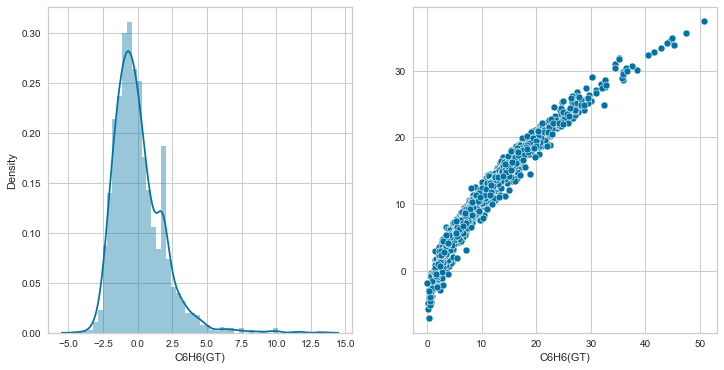

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.distplot(Y_test-lm_predict, ax=ax1)
sns.scatterplot(Y_test,lm_predict, ax=ax2)
plt.show()

In [26]:
lmstat = [round(metrics.mean_squared_error(Y_test,lm_predict),4), round(np.sqrt(metrics.mean_squared_error(Y_test,lm_predict)),4),round(metrics.r2_score(Y_test,lm_predict)*100,4)]
print('MSE value for LinearRegression model is {}'.format(lmstat[0]))
print('RMSE value for LinearRegression model is {}'.format(lmstat[1]))
print('R^2 value for LinearRegression model is {}'.format(lmstat[2]))

MSE value for LinearRegression model is 3.1769
RMSE value for LinearRegression model is 1.7824
R^2 value for LinearRegression model is 94.5729


### Lasso Regression Model 

In [27]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3.776727548312271


In [28]:
lasso_predict = lasso_regressor.predict(X_test)

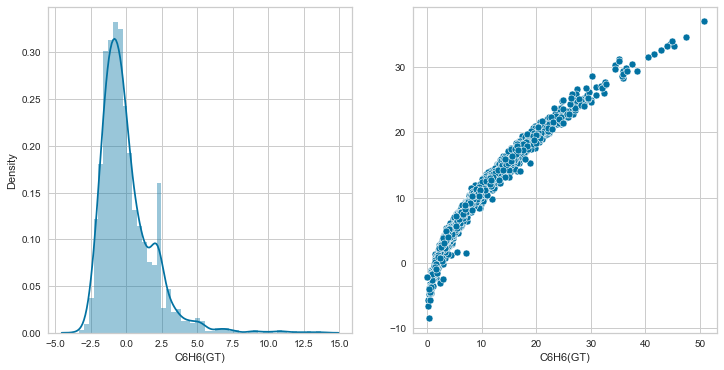

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.distplot(Y_test-lasso_predict, ax=ax1)
sns.scatterplot(Y_test,lasso_predict, ax=ax2)
plt.show()

In [30]:
lassostat = [round(metrics.mean_squared_error(Y_test,lasso_predict),4), round(np.sqrt(metrics.mean_squared_error(Y_test,lasso_predict)),4),round(metrics.r2_score(Y_test,lasso_predict)*100,4)]
print('MSE value for LassoRegression model is {}'.format(lassostat[0]))
print('RMSE value for LassoRegression model is {}'.format(lassostat[1]))
print('R^2 value for LassoRegression model is {}'.format(lassostat[2]))

MSE value for LassoRegression model is 3.3902
RMSE value for LassoRegression model is 1.8412
R^2 value for LassoRegression model is 94.2085


### Decision Tree Model

In [31]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,Y_train)
dt_predict=dtree.predict(X_test)

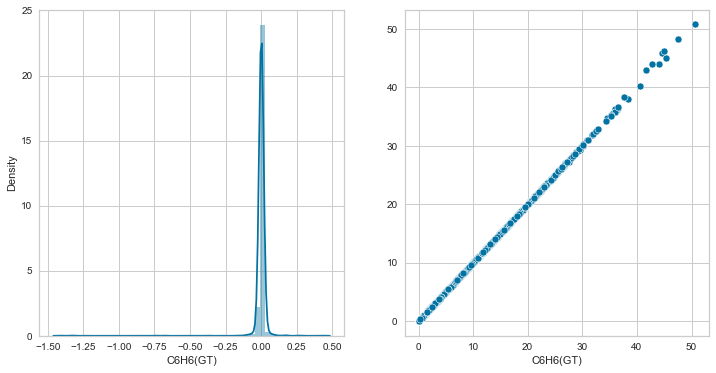

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.distplot(Y_test-dt_predict, ax=ax1)
sns.scatterplot(Y_test,dt_predict, ax=ax2)
plt.show()

In [33]:
dtstat = [round(metrics.mean_squared_error(Y_test,dt_predict),4), round(np.sqrt(metrics.mean_squared_error(Y_test,dt_predict)),4),round(metrics.r2_score(Y_test,dt_predict)*100,4)]
print('MSE value for Decision Tree Regression model is {}'.format(dtstat[0]))
print('RMSE value for Decision Tree Regression model is {}'.format(dtstat[1]))
print('R^2 value for Decision Tree Regression model is {}'.format(dtstat[2]))

MSE value for Decision Tree Regression model is 0.0049
RMSE value for Decision Tree Regression model is 0.0697
R^2 value for Decision Tree Regression model is 99.9917


In [34]:
conclusion = pd.DataFrame(data=[lmstat,lassostat,dtstat],
                          index=['Linear Regression','Lasso Regression','Decision Tree Regression'],
                         columns = ['MSE','RMSE','R^2'])
conclusion

,MSE,RMSE,R^2
Linear Regression,3.1769,1.7824,94.5729
Lasso Regression,3.3902,1.8412,94.2085
Decision Tree Regression,0.0049,0.0697,99.9917


# Modelling for 2nd Imputed Dataset "df"- Response Variable ('PT08.S1(CO)')

### Train & Test Split

In [35]:
X = df.drop('PT08.S1(CO)',1)     
Y = df['PT08.S1(CO)']   
SScaler = StandardScaler()
Xt = SScaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xt,Y,test_size=0.35, random_state=3)

In [37]:
print('Training Data Size:',X_train.shape)
print('Test Data Size:',X_test.shape)

Training Data Size: (5844, 10)
Test Data Size: (3147, 10)


### Linear regression

In [38]:
#sns.histplot(data=df, x="PT08.S1(CO)", kde=True)

In [39]:
LRmodl= LinearRegression()

In [40]:
LRmodl.fit(X_train, y_train)

LinearRegression()

In [41]:
#Predictions
LRpred = LRmodl.predict(X_test)
LRpred

array([1215.1493391 ,  882.64578881, 1298.46956957, ...,  739.77299522,
        997.72623769,  846.48075118])

Text(0.5, 1.0, 'Linear Model')

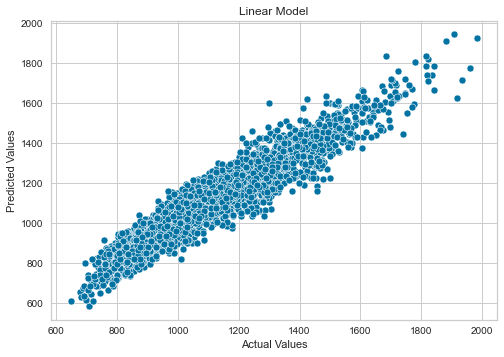

In [42]:
# Predicted vs Actual values plot
sns.scatterplot(x = y_test, y = LRpred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Model')

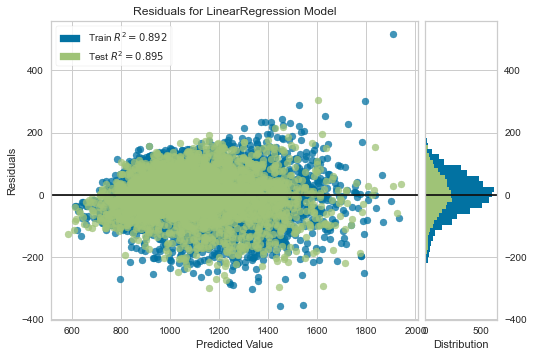

In [43]:
#residuals vs Predicted plot for Linear Model
visualizer1 = ResidualsPlot(LRmodl)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)
visualizer1.show();

In [44]:
#RMSE values
Lrmse = round(np.sqrt(metrics.mean_absolute_error(y_test, LRpred)),3)
Lrmse

7.368

In [45]:
# R-squared scores
LRr2 = round(metrics.r2_score(y_test, LRpred), 3)
LRr2

0.895

# Random Forest Regression

In [46]:
RFRmodl = RandomForestRegressor()

In [47]:
RFRmodl.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
RFRpred = RFRmodl.predict(X_test)
RFRpred

array([1271.51833333,  900.315     , 1182.9675    , ...,  772.3725    ,
        892.76      ,  833.745     ])

Text(0.5, 1.0, 'Random Forest Model')

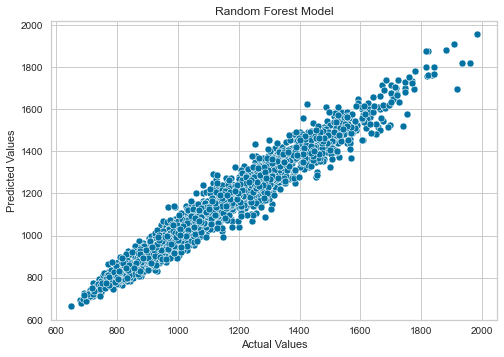

In [49]:
sns.scatterplot(x = y_test, y = RFRpred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model')

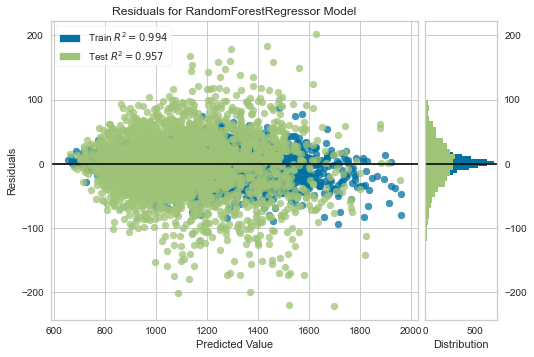

In [50]:
#Residual Plot for Random Forest Model

visualizer2 = ResidualsPlot(RFRmodl)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)
visualizer2.show();

In [51]:
RFrmse = round(np.sqrt(metrics.mean_absolute_error(y_test, RFRpred)),3)
RFrmse

5.769

In [52]:
# R-squared scores
RFRr2 = round(metrics.r2_score(y_test, RFRpred),3)
RFRr2

0.957

In [53]:
pd.DataFrame(data=[[Lrmse, LRr2],[RFrmse, RFRr2]],
                          index=['Linear Regression', 'Random Forest Regression'],
                         columns = ['RMSE','R^2'])

,RMSE,R^2
Linear Regression,7.368,0.895
Random Forest Regression,5.769,0.957


#### Random Forest model yielded better Rsquared value and Lower Rmse value when compared to Linear Regression for second Imputed data set